<a href="https://colab.research.google.com/github/mijanr/GANs/blob/master/cGAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#necessary imports
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm, trange

In [4]:
#set a fixed image size
sns.set(rc={'image.cmap':'gray', 'figure.figsize':(12,10)})
sns.set_style("darkgrid")

In [5]:
#load the dataset
dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
#dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True)

In [7]:
#plot a grid of images
def plot_grid(images):
    grid = torchvision.utils.make_grid(images)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()

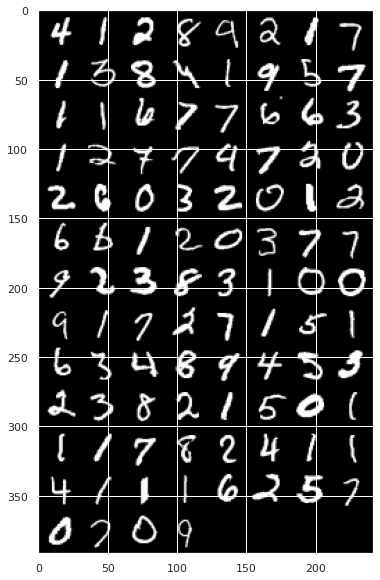

In [8]:
#plot a grid of images
plot_grid(next(iter(dataloader))[0])

In [9]:
#Let's create a Conditional GAN
#Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(10, 10)
        self.sequential = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    def forward(self, z, labels):
        c = self.embedding(labels)
        x = torch.cat([z, c], 1)
        return self.sequential(x)#.view(-1, 1, 28, 28)
#Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(10, 10)
        self.sequential = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x, labels):
        c = self.embedding(labels)
        x = torch.cat([x, c], 1)
        return self.sequential(x)

In [10]:
gen = Generator()
disc = Discriminator()

In [11]:
X = torch.randn(10, 100)
print(X.shape)
labels = torch.randint(0, 10, (10,))
out = gen(X, labels)
print(out.shape)

torch.Size([10, 100])
torch.Size([10, 784])


In [12]:
disc(out, labels)

tensor([[0.5024],
        [0.4973],
        [0.4987],
        [0.5043],
        [0.5026],
        [0.4993],
        [0.5024],
        [0.5035],
        [0.5040],
        [0.5039]], grad_fn=<SigmoidBackward0>)

In [13]:
#optimizer
opt_gen = torch.optim.Adam(gen.parameters(), lr=0.0002)
opt_disc = torch.optim.Adam(disc.parameters(), lr=0.0002)
#loss function
loss = nn.BCELoss()

In [14]:
for real, labels in dataloader:
    print(real.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


100%|██████████| 600/600 [00:56<00:00, 10.57it/s]


Epoch 1/100, Loss D: 0.4599, Loss G: 2.5875


100%|██████████| 600/600 [00:56<00:00, 10.68it/s]


Epoch 2/100, Loss D: 4.0983, Loss G: 2.5712


100%|██████████| 600/600 [00:54<00:00, 11.00it/s]


Epoch 3/100, Loss D: 0.6379, Loss G: 2.9528


100%|██████████| 600/600 [00:54<00:00, 11.00it/s]


Epoch 4/100, Loss D: 0.4992, Loss G: 2.2000


100%|██████████| 600/600 [00:54<00:00, 10.98it/s]


Epoch 5/100, Loss D: 0.7933, Loss G: 1.7468


100%|██████████| 600/600 [00:53<00:00, 11.23it/s]


Epoch 6/100, Loss D: 0.5779, Loss G: 1.7285


100%|██████████| 600/600 [00:53<00:00, 11.14it/s]


Epoch 7/100, Loss D: 0.7044, Loss G: 1.4463


100%|██████████| 600/600 [00:52<00:00, 11.35it/s]


Epoch 8/100, Loss D: 0.8816, Loss G: 2.2635


100%|██████████| 600/600 [00:52<00:00, 11.39it/s]


Epoch 9/100, Loss D: 1.0325, Loss G: 1.6205


100%|██████████| 600/600 [00:52<00:00, 11.36it/s]


Epoch 10/100, Loss D: 0.7324, Loss G: 1.3377


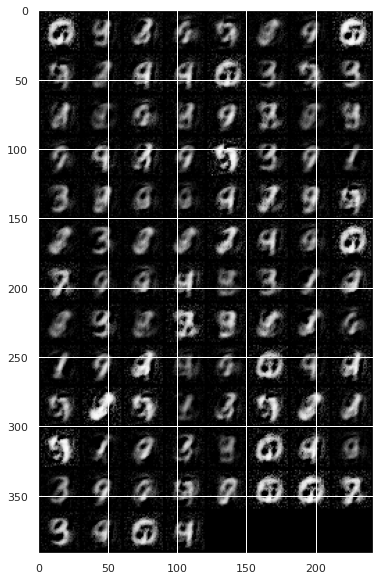

100%|██████████| 600/600 [00:53<00:00, 11.18it/s]


Epoch 11/100, Loss D: 0.8181, Loss G: 1.7418


100%|██████████| 600/600 [00:54<00:00, 10.96it/s]


Epoch 12/100, Loss D: 0.7569, Loss G: 1.4796


100%|██████████| 600/600 [00:53<00:00, 11.23it/s]


Epoch 13/100, Loss D: 1.0542, Loss G: 1.6156


100%|██████████| 600/600 [00:53<00:00, 11.16it/s]


Epoch 14/100, Loss D: 0.9560, Loss G: 1.4926


100%|██████████| 600/600 [00:53<00:00, 11.18it/s]


Epoch 15/100, Loss D: 1.2515, Loss G: 1.9791


100%|██████████| 600/600 [00:54<00:00, 11.03it/s]


Epoch 16/100, Loss D: 1.2584, Loss G: 1.4424


100%|██████████| 600/600 [00:53<00:00, 11.17it/s]


Epoch 17/100, Loss D: 0.9780, Loss G: 2.2505


100%|██████████| 600/600 [00:53<00:00, 11.15it/s]


Epoch 18/100, Loss D: 0.9807, Loss G: 1.5700


100%|██████████| 600/600 [00:54<00:00, 11.03it/s]


Epoch 19/100, Loss D: 0.8801, Loss G: 1.6382


100%|██████████| 600/600 [00:55<00:00, 10.89it/s]


Epoch 20/100, Loss D: 0.9183, Loss G: 1.8477


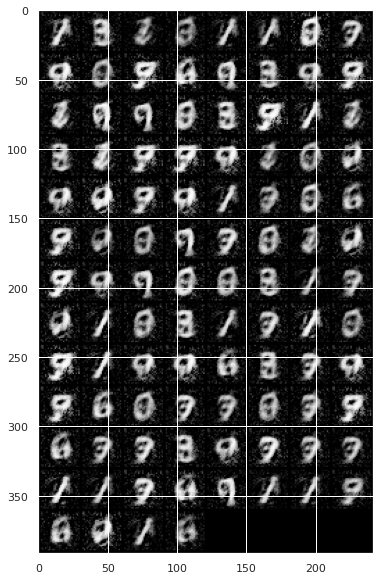

100%|██████████| 600/600 [00:54<00:00, 11.05it/s]


Epoch 21/100, Loss D: 0.9073, Loss G: 1.9301


100%|██████████| 600/600 [00:54<00:00, 11.08it/s]


Epoch 22/100, Loss D: 0.7370, Loss G: 1.7971


100%|██████████| 600/600 [00:53<00:00, 11.13it/s]


Epoch 23/100, Loss D: 0.9939, Loss G: 1.8620


100%|██████████| 600/600 [00:54<00:00, 10.94it/s]


Epoch 24/100, Loss D: 0.9555, Loss G: 2.1332


 77%|███████▋  | 463/600 [00:41<00:12, 11.30it/s]

In [ ]:
#training
epochs = 100
for epoch in range(epochs):
    for real, labels in tqdm(dataloader):
        #real = real.view(-1, 784)
        real = real.view(-1, 784)
        #training discriminator
        opt_disc.zero_grad()
        #real
        D_real = disc(real, labels)
        loss_real = loss(D_real, torch.ones_like(D_real))
        #fake
        z = torch.randn(100, 100)
        fake_labels = torch.randint(0, 10, (100,))
        fake = gen(z, fake_labels)
        D_fake = disc(fake.detach(), fake_labels)
        loss_fake = loss(D_fake, torch.zeros_like(D_fake))
        #total loss
        loss_disc = loss_real + loss_fake
        loss_disc.backward()
        opt_disc.step()
        #training generator
        opt_gen.zero_grad()
        D_fake = disc(fake, fake_labels)
        loss_gen = loss(D_fake, torch.ones_like(D_fake))
        loss_gen.backward()
        opt_gen.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss D: {loss_disc.item():.4f}, Loss G: {loss_gen.item():.4f}")
    #plot fake images after every 10 epochs
    if (epoch+1)%10 == 0:
        plot_grid(fake.view(-1, 1, 28, 28).detach())
    